In [16]:
from Exercise import Exercise, MarkdownBlock
from config import URL, TOKEN
import json

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size': 20})

from sklearn.datasets import load_digits
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Exercise.URL = URL
Exercise.TOKEN = TOKEN

### Defining an exercise
Exercises can be instantiated from the `Exercise` class.
An exercise is instantiated by passing a markdown string with the exercise content being displayed to the learner.
This markdown string can contain latex, which must be wrapped in dollar signs ($).
The rendered exercise content can be seen by calling the `display` method on an exercise instance.

In [17]:
m = "What is $1 + 1$?"
e = Exercise(m)
e.display()

### Adding answer rules
Answers can be added using the `add_answer` method. User-answers can be simulated for testing purposes by using the `evaluate_answer` method.

In [18]:
e.add_answer(2, True, "That's right! $1 + 1 = 2$")
e.evaluate_answer(2)

In [19]:
e.add_answer(0, False, "Unfortunately that's not right, did you compute $1 - 1 = 0$ instead?")
e.evaluate_answer(0)

Default feedback can be added, shown to the user when no answer rule matches, defaulting to "Incorrect" if not specified.

In [20]:
e.add_default_feedback("Please check the definition of natural numbers and the ($+$) operator")
e.evaluate_answer(3)

Before an exercise can be published, it should be written.

In [21]:
e.write()
e.publish()
# print(json.dumps(e.data, indent=2))

Published succesfully, preview at: https://www.mscthesis.nl/preview?id=b3fc9b31-0910-4215-945c-51c823b17f6c


### Parameterizing an exercise
An exercise can contain parameters by using the `@param` notation in markdown templates. A dict containing SymPy objects should then be passed to a MarkdownBlock to replace the parameters with LaTeX code generated by the MarkdownBlock.

In [13]:
m = r"What is $@a + @b$?"

params = {}
params["a"] = np.random.randint(10)
params["b"] = np.random.randint(10)

e = Exercise(MarkdownBlock(m, params))
e.add_answer(params["a"] + params["b"], True, "That's right!")

e.display()

e.write()

{
  "id": "0adfe940-f119-48a4-8a0e-6a094cbacd1a",
  "html": "<p>What is <span class=\"arithmatex\">$6 + 2$</span>?</p>",
  "default_feedback": "Incorrect, no specific feedback provided matching your answer",
  "answers": {
    "8": {
      "expression": "8",
      "correct": true,
      "feedback": "<p>That's right!</p>"
    }
  }
}


### Exercises with matrices
#### Vector addition

In [23]:
m = r"What is $@a + @b$?"

params = {}
params["a"] = sp.Matrix(np.arange(4))
params["b"] = sp.Matrix(np.flip(np.arange(4)))

e = Exercise(MarkdownBlock(m, params))
e.add_answer(params["a"] + params["b"], True, "Correct!")
e.display()

e.write()
e.publish()

Published succesfully, preview at: https://www.mscthesis.nl/preview?id=e685d75f-1b24-4b5d-bf8c-e90f725946cd


#### Matrix multiplication

In [9]:
m = r"What is $@a @b$?"

params = {}
params["a"] = sp.Matrix(np.arange(6).reshape((2,3)))
params["b"] = sp.Matrix(np.arange(6).reshape((3,2)))

ans = params["a"] * params["b"]

e = Exercise(MarkdownBlock(m, params))
e.add_answer(ans, True, "Correct!")
e.display()

e.write()
e.publish()

Published succesfully, preview at: https://www.mscthesis.nl/preview?id=8dd80235-b7c2-4532-8cb3-e6fe3d315de7


In [12]:
digits = load_digits()
sorted_indices = np.argsort(digits.target)
nums = digits.images[sorted_indices]

def save_image_for(matrix, filename):
    fig, ax = plt.subplots()
    
    ax.xaxis.set_label_position('top')
    ax.set_xticklabels([i for i in range(0, 9)])

    ax.yaxis.set_label_position('left') 
    ax.set_yticklabels([i for i in range(0, 9)])

    # Minor ticks
    ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 10, 1), minor=True)

    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    ax.matshow(matrix, cmap='binary')
    
    plt.savefig(filename, dpi=300, bbox_inches='tight')


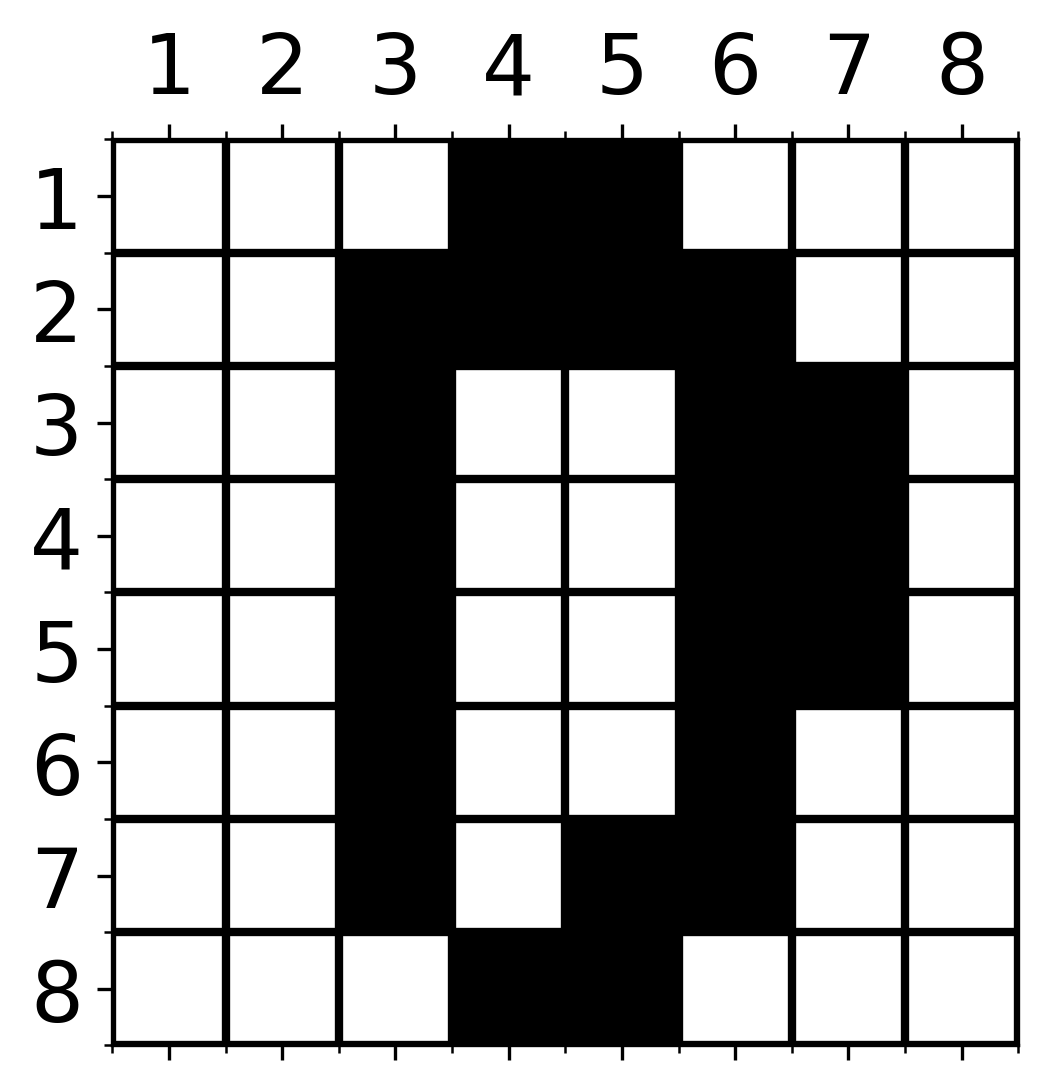
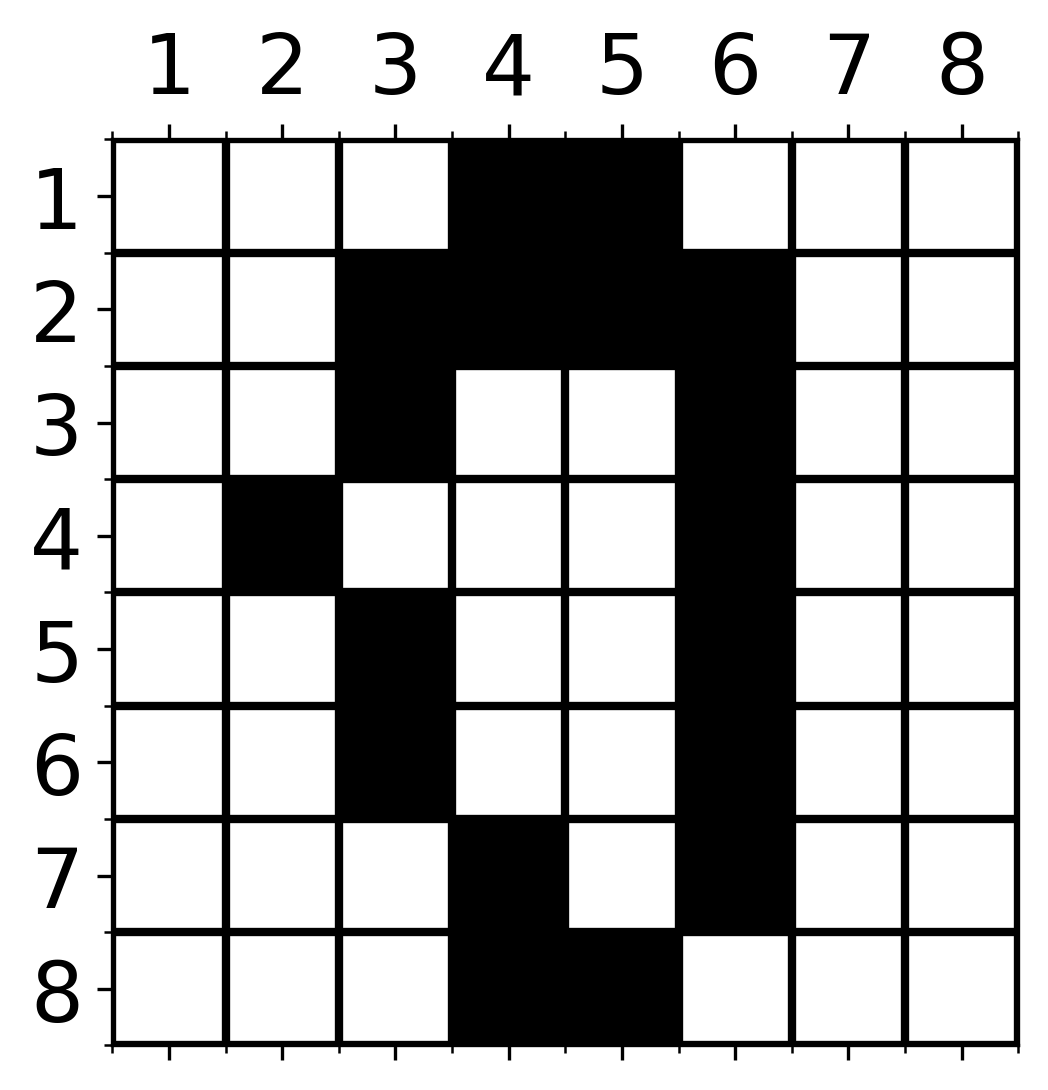
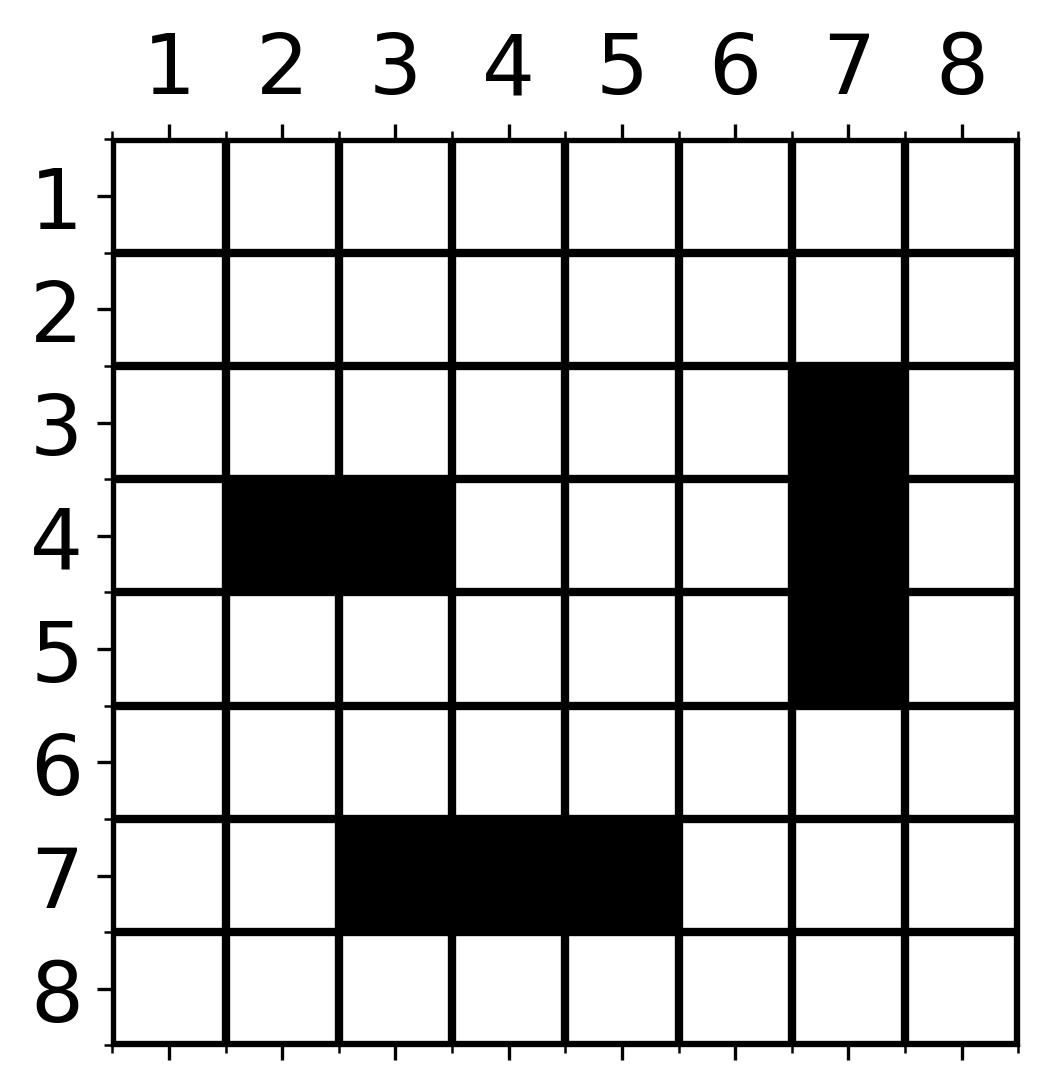

In [15]:
def to_binary(m):
    return np.where(m > 7, 1, 0)

zero_1 = nums[0]
zero_1 = to_binary(zero_1)

zero_2 = nums[1]
zero_2 = to_binary(zero_2)

# save_image_for(zero_1, "zero_1")
# save_image_for(zero_2, "zero_2")
# save_image_for(np.abs(zero_1 - zero_2), "diff")


t = r"""
<div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    $A = $<img src="zero_1.png" width="150"/>
    $B = $<img src="zero_2.png" width="150"/>
    $D = $<img src="diff.png" width="150"/>
</div>

$A = @z1, B = @z2, D = |A - B| = @d, \sum D = @s$
"""

z1 = sp.Matrix(zero_1)
z2 = sp.Matrix(zero_2)
params = {}
params["z1"] = z1
params["z2"] = z2

distance_matrix = np.abs(z1 - z2)
d = sp.Matrix(distance_matrix)
params["d"] = d
params["s"] = np.sum(distance_matrix)

e = Exercise(MarkdownBlock(t, params))
e.display()
e.write()
# e.publish()

#### Matrix indexing

Tasks:
- Create exercise testing vector indexing
- Create exercise testing vector inner-product
- Create exercise testing matrix multiplication

In [11]:
m = r"""
Consider the matrix $A = @a$

What is $a_{@i,@j}$?
"""

a = np.arange(25)
np.random.shuffle(a)
a = a.reshape((5, 5))

params = {}
params["a"] = sp.Matrix(a)
params["i"] = sp.simplify(np.random.randint(6))
params["j"] = sp.simplify(np.random.randint(6))

e = Exercise(MarkdownBlock(m, params))
e.display()

e.html
e.write()
e.publish()

Published succesfully, preview at: https://www.mscthesis.nl/preview?id=423ee712-071c-44f4-bf67-cdeb9aadd249
